# Programming Lesson and Exercises - DAS <span class="tocSkip"></span>

The goal of these programming lesson and exercises is to teach you how to filter and aggregate time series data.


# Introduction to this template notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`, **renamed** to `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
* Keep the copy in the same folder, so that the provided data sets can be loaded.

You are expected to work with Python code in this notebook. The locations where you should write your solutions can be recognized by **marker lines**, which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">
<ul>
    <li>Do NOT modify or delete these marker lines.  Keep them as they are.</li>
    <li>NEVER write code <i>outside</i> the marked blocks. Such code cannot be evaluated.</li>
</ul>
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

## Personalize your notebook

1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```

1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name, identification number,_ and the current _date_ (i.e. when you first modified this notebook, e.g. `'2020-02-26'`) as strings between quotes.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_NAME = 'Toma Andrei Sacuiu'
AUTHOR_ID_NR = '1681591'
AUTHOR_DATE = '2022-03-18'

#// END_TODO [Author]

AUTHOR_NAME, AUTHOR_ID_NR, AUTHOR_DATE

('Toma Andrei Sacuiu', '1681591', '2022-03-18')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lesson-introduction" data-toc-modified-id="Lesson-introduction-1">Lesson introduction</a></span><ul class="toc-item"><li><span><a href="#Loading-the-libraries" data-toc-modified-id="Loading-the-libraries-1.1">Loading the libraries</a></span></li></ul></li><li><span><a href="#1.-Filtering" data-toc-modified-id="1.-Filtering-2"><span class="section">1.</span> Filtering</a></span><ul class="toc-item"><li><span><a href="#Gaussian-filter" data-toc-modified-id="Gaussian-filter-2.1">Gaussian filter</a></span></li><li><span><a href="#Rolling-windows" data-toc-modified-id="Rolling-windows-2.2">Rolling windows</a></span></li><li><span><a href="#Filtering-mouse-trajectories" data-toc-modified-id="Filtering-mouse-trajectories-2.3">Filtering mouse trajectories</a></span><ul class="toc-item"><li><span><a href="#Exercise-1.a" data-toc-modified-id="Exercise-1.a-2.3.1">Exercise <span class="exercise">1.a</span></a></span></li><li><span><a href="#Exercise-1.b" data-toc-modified-id="Exercise-1.b-2.3.2">Exercise <span class="exercise">1.b</span></a></span></li><li><span><a href="#Exercise-1.c" data-toc-modified-id="Exercise-1.c-2.3.3">Exercise <span class="exercise">1.c</span></a></span></li><li><span><a href="#Exercise-1.d" data-toc-modified-id="Exercise-1.d-2.3.4">Exercise <span class="exercise">1.d</span></a></span></li><li><span><a href="#Exercise-1.e" data-toc-modified-id="Exercise-1.e-2.3.5">Exercise <span class="exercise">1.e</span></a></span></li></ul></li><li><span><a href="#Computing-changes-and-finding-maxima" data-toc-modified-id="Computing-changes-and-finding-maxima-2.4">Computing changes and finding maxima</a></span><ul class="toc-item"><li><span><a href="#Exercise-1.f" data-toc-modified-id="Exercise-1.f-2.4.1">Exercise <span class="exercise">1.f</span></a></span></li><li><span><a href="#Exercise-1.g" data-toc-modified-id="Exercise-1.g-2.4.2">Exercise <span class="exercise">1.g</span></a></span></li><li><span><a href="#Exercise-1.h" data-toc-modified-id="Exercise-1.h-2.4.3">Exercise <span class="exercise">1.h</span></a></span></li></ul></li><li><span><a href="#Approximating-derivatives-and-finding-trends" data-toc-modified-id="Approximating-derivatives-and-finding-trends-2.5">Approximating derivatives and finding trends</a></span><ul class="toc-item"><li><span><a href="#Exercise-1.i" data-toc-modified-id="Exercise-1.i-2.5.1">Exercise <span class="exercise" id="approximate_speed">1.i</span></a></span></li></ul></li></ul></li><li><span><a href="#2.-Data-aggregation" data-toc-modified-id="2.-Data-aggregation-3"><span class="section">2.</span> Data aggregation</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3.1">Data preparation</a></span><ul class="toc-item"><li><span><a href="#Data:-mouse-trajectories" data-toc-modified-id="Data:-mouse-trajectories-3.1.1">Data: mouse trajectories</a></span></li><li><span><a href="#Multi-level-indexing" data-toc-modified-id="Multi-level-indexing-3.1.2">Multi-level indexing</a></span></li><li><span><a href="#Data:-user-properties" data-toc-modified-id="Data:-user-properties-3.1.3">Data: user properties</a></span></li><li><span><a href="#Conversion-to-readable-table-entries" data-toc-modified-id="Conversion-to-readable-table-entries-3.1.4">Conversion to readable table entries</a></span></li><li><span><a href="#Data:-user-trial-properties" data-toc-modified-id="Data:-user-trial-properties-3.1.5">Data: user trial properties</a></span></li><li><span><a href="#Exercise-2.a" data-toc-modified-id="Exercise-2.a-3.1.6">Exercise <span class="exercise">2.a</span></a></span></li><li><span><a href="#Exercise-2.b" data-toc-modified-id="Exercise-2.b-3.1.7">Exercise <span class="exercise">2.b</span></a></span></li></ul></li><li><span><a href="#Data-aggregation" data-toc-modified-id="Data-aggregation-3.2">Data aggregation</a></span><ul class="toc-item"><li><span><a href="#Computing-several-aggregated-quantities-at-once" data-toc-modified-id="Computing-several-aggregated-quantities-at-once-3.2.1">Computing several aggregated quantities at once</a></span></li><li><span><a href="#Joining-two-dataframes" data-toc-modified-id="Joining-two-dataframes-3.2.2">Joining two dataframes</a></span></li><li><span><a href="#Exercise-2.c" data-toc-modified-id="Exercise-2.c-3.2.3">Exercise <span class="exercise">2.c</span></a></span></li><li><span><a href="#Exercise-2.d" data-toc-modified-id="Exercise-2.d-3.2.4">Exercise <span class="exercise">2.d</span></a></span></li></ul></li></ul></li><li><span><a href="#3.-Empirical-cumulative-distribution-functions" data-toc-modified-id="3.-Empirical-cumulative-distribution-functions-4"><span class="section">3.</span> Empirical cumulative distribution functions</a></span><ul class="toc-item"><li><span><a href="#Exercises:-compare-ECDFs-for-mouse-a-trackpad-trajectories" data-toc-modified-id="Exercises:-compare-ECDFs-for-mouse-a-trackpad-trajectories-4.1">Exercises: compare ECDFs for mouse a trackpad trajectories</a></span><ul class="toc-item"><li><span><a href="#Exercise-3.a" data-toc-modified-id="Exercise-3.a-4.1.1">Exercise <span class="exercise">3.a</span></a></span></li><li><span><a href="#Exercise-3.b" data-toc-modified-id="Exercise-3.b-4.1.2">Exercise <span class="exercise">3.b</span></a></span></li><li><span><a href="#Exercise-3.c" data-toc-modified-id="Exercise-3.c-4.1.3">Exercise <span class="exercise">3.c</span></a></span></li><li><span><a href="#Exercise-3.d" data-toc-modified-id="Exercise-3.d-4.1.4">Exercise <span class="exercise">3.d</span></a></span></li><li><span><a href="#Exercise-3.e" data-toc-modified-id="Exercise-3.e-4.1.5">Exercise <span class="exercise">3.e</span></a></span></li><li><span><a href="#Exercise-3.f" data-toc-modified-id="Exercise-3.f-4.1.6">Exercise <span class="exercise">3.f</span></a></span></li><li><span><a href="#Exercise-3.g" data-toc-modified-id="Exercise-3.g-4.1.7">Exercise <span class="exercise">3.g</span></a></span></li></ul></li></ul></li><li><span><a href="#4.-Exercise:-find-ballistic-motion" data-toc-modified-id="4.-Exercise:-find-ballistic-motion-5"><span class="section">4.</span> Exercise: find ballistic motion</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Exercise-4.a" data-toc-modified-id="Exercise-4.a-5.0.1">Exercise <span class="exercise">4.a</span></a></span></li><li><span><a href="#Exercise-4.b" data-toc-modified-id="Exercise-4.b-5.0.2">Exercise <span class="exercise">4.b</span></a></span></li><li><span><a href="#Exercise-4.c" data-toc-modified-id="Exercise-4.c-5.0.3">Exercise <span class="exercise">4.c</span></a></span></li><li><span><a href="#Exercise-4.d" data-toc-modified-id="Exercise-4.d-5.0.4">Exercise <span class="exercise">4.d</span></a></span></li><li><span><a href="#Exercise-4.e" data-toc-modified-id="Exercise-4.e-5.0.5">Exercise <span class="exercise">4.e</span></a></span></li></ul></li></ul></li></ul></div>

# Lesson introduction

In these lessons, we are going to extract features from the mouse trajectories recorded in the mouse experiment. We will first extract features by filtering signals, where a signal represents a quantity that changes with respect to another variable variable (e.g. time). For this, we will need to learn:

* how to filter signals in _Python_
* how to work with some new _Pandas_ functions

Next, we will extract more features and perform aggregation over the recorded data and will learn

* how to use the _Pandas_ **`agg()`** for convenient aggregation and computation of simple features
* how to combine/join two _Pandas_ tables with the function **`join()`**
* how to compute, use and plot empirical cumulative distribution functions

## Loading the libraries

To show examples, we load some Data Analytics libraries first:

In [2]:
import numpy as np  # import auxiliary library, typical idiom
import pandas as pd  # import the Pandas library, typical idiom

from statsmodels.distributions.empirical_distribution import ECDF

from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from scipy import stats

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

from mouse_experiment import MouseExperiment

# reveal a hint only while holding the mouse down
from IPython.display import HTML
HTML("<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>")


# <span class="section">1.</span> Filtering



To illustrate how to filter signals, we will apply filtering to the (time series in the) _stocks_ data set that we have also seen in the visualization exercises. In the exercises that follow, you will apply what you have learned to recorded mouse trajectories.

This time, the _stocks_ data set contains the _daily_ (rather than the monthly) closing value of the <a href="https://en.wikipedia.org/wiki/NASDAQ_Composite">NASDAQ Composite</a> index. We first load the data into a dataframe `df_nasdaq`.

In [3]:
df_nasdaq = pd.read_csv('datasets/NASDAQ.csv', parse_dates=[0])
df_nasdaq = df_nasdaq.set_index('Date')[['Close']]
df_nasdaq.columns = ['close']
df_nasdaq.head()

,close
Date,
2007-01-03,2423.159912
2007-01-04,2453.429932
2007-01-05,2434.250000
2007-01-08,2438.199951
2007-01-09,2443.830078


Let us plot the daily closing index.

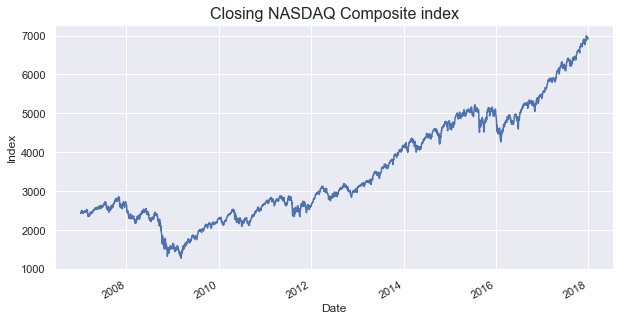

In [4]:
ax = df_nasdaq['close'].plot()
ax.set_ylabel('Index')
ax.set_title('Closing NASDAQ Composite index',fontsize=16);

## Gaussian filter

As you can see, the closing price is very volatile. If we want to approximate the graph by a curve that is more smooth, we can do so by _filtering_. In this case, we apply a Gaussian filter. We store the filtered data in a column called `'close_filtered'`. The Gaussian filter needs a parameter `sigma`, the standard deviation, which gives an indication of the width of the applied filter. We choose `sigma` to be `30` (days). 

(There are different ways to deal with the boundaries. We choose the mode `'nearest'`, since for the later exercises it is the most natural choice.)

In [5]:
df_nasdaq['close_filtered'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, mode='nearest')
df_nasdaq.head()

,close,close_filtered
Date,,
2007-01-03,2423.159912,2438.967378
2007-01-04,2453.429932,2439.354293
2007-01-05,2434.250000,2439.740575
2007-01-08,2438.199951,2440.126123
2007-01-09,2443.830078,2440.511070


Let us plot the filtered data together with the original prices in one figure.

Text(0, 0.5, 'Index')

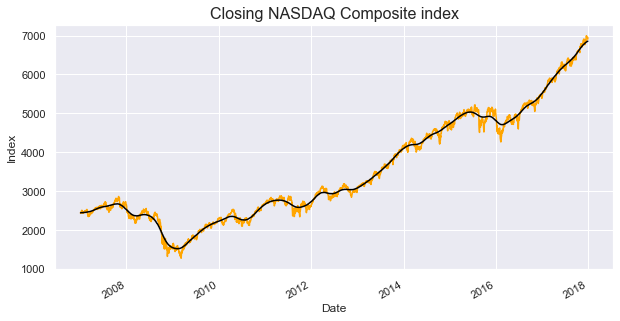

In [6]:
ax_nasdaq = df_nasdaq['close'].plot(color='orange')
df_nasdaq['close_filtered'].plot(ax = ax_nasdaq, color='black');
ax_nasdaq.set_title('Closing NASDAQ Composite index',fontsize=16);
ax_nasdaq.set_ylabel('Index')

## Rolling windows

There are many more ways to filter signals, each with their own advantages and disadvantages. A **median filter** is not so sensitive to outliers as a Gaussian filter.

The Pandas function **`rolling()`** lets you compute rolling-window statistics, such as a rolling median. To use it, you need to specify the size of the window. In the following example, we used a window size of `5`. You can then apply a statistic to the result: in our median-filter example, we calculate the `median`. 

In [7]:
df_nasdaq['median_filtered'] = df_nasdaq['close'].rolling(5).median()
df_nasdaq.head(10)

,close,close_filtered,median_filtered
Date,,,
2007-01-03,2423.159912,2438.967378,NaN
2007-01-04,2453.429932,2439.354293,NaN
2007-01-05,2434.250000,2439.740575,NaN
2007-01-08,2438.199951,2440.126123,NaN
2007-01-09,2443.830078,2440.511070,2438.199951
2007-01-10,2459.330078,2440.895398,2443.830078
2007-01-11,2484.850098,2441.279204,2443.830078
2007-01-12,2502.820068,2441.662644,2459.330078
2007-01-16,2497.780029,2442.045911,2484.850098


In every row of the resulting series, you get the median of the values in the window. If you have a window size of `k`, the result in the `n`th row is the median of the rows `n-k+1`, `n-k+2` up to `n`. Note that for rows `0` to `k-1` the median of the window cannot be computed, resulting in `NaN` values in those rows.

Let us plot the filtered data together with the original prices in one figure.

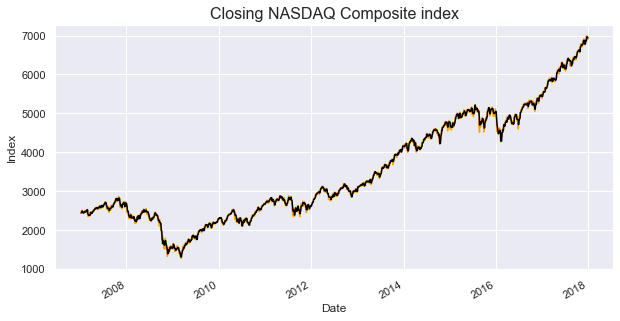

In [8]:
ax_nasdaq = df_nasdaq['close'].plot(color='orange')
df_nasdaq['median_filtered'].plot(ax=ax_nasdaq, color='black');
ax_nasdaq.set_title('Closing NASDAQ Composite index',fontsize=16);
ax_nasdaq.set_ylabel('Index');

## Filtering mouse trajectories

Now we will apply the filtering to recorded mouse trajectories stored in the file `'datasets/paths.csv'`.

In [9]:
df_paths = pd.read_csv('datasets/paths.csv', parse_dates=[0])

<div class="alert-info alert" role="alert-info">

You may also like to experiment on trajectories that you record yourself. The following code will launch the mouse experiment and store the recorded trajectories in the dataframe <tt>df_paths</tt>:

<br>
<tt>
experiment     = MouseExperiment()<br>
_, df_paths, _ = experiment.start()
</tt>
<br>

When you execute this code (by uncommenting it in the code cell below) the application will start in a new window. Note, that it may be minimized, in which case you may need to find it in the task bar. Next, draw some trajectories. When you close the window, the trajectories will be stored in the dataframe <tt>df_paths</tt>.

**Before you submit your notebook, make sure that your code also works on the trajectories provided in <tt>datasets/paths.csv</tt>.**

Hint: It is easier to understand the exercises if you <b>make a drawing, such as a triangle or a square</b>, instead of drawing straight lines.
</div>

In [10]:
#experiment = MouseExperiment()
#_, df_paths, _ = experiment.start()

We print below the first five rows of `df_paths`.

In [11]:
df_paths.head()

,trial,t,x,y
0,15,0.000000,1,-2
1,15,1.436910,0,-2
2,15,2.017927,-1,-2
3,15,2.370731,-2,-2
4,15,2.411801,-3,-2


> **NOTE:** We will use the term *trajectory* and *path* interchangeably.

The meaning of the different columns is as follows:

* The **`'trial'`** column contains a unique number per trajectory
* The **`'t'`** column contains contains the time since the start of the trial in ms
* The **`'x'`** column contains the $x$-coordinate on the trajectory at time `'t'` in pixels
* The **`'y'`** column contains the $y$-coordinate on the trajectory at time `'t'` in pixels

We make sure that the `'trial'` column is of integer type, which is needed for the later exercises:

In [12]:
df_paths['trial'] = df_paths['trial'].astype(int)

### Exercise <span class="exercise">1.a</span>

Plot the trajectories obtained from the experiment, i.e. those stored in `df_paths`, in one figure, with both axes ranging from -300 to 300. Recall that different trajectories have a different `'trial'` number.

Here is an example of a possible result for two mouse trajectories:

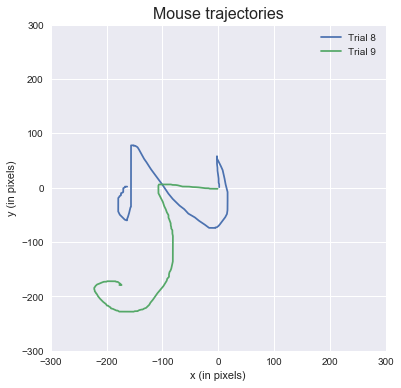

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
You can plot two columns labeled `'col_1'` and `'col_2'` from a dataframe or a groupby object against each other by providing the arguments `x='col_1'` and `y='col_2'` to the plot function.
</span>

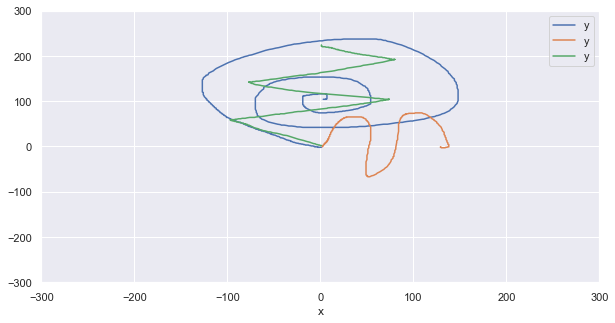

In [13]:
#// BEGIN_TODO [DAS_1a] Visualize the paths (1 point)

fig1, ax1 = plt.subplots()

for i, group in df_paths.groupby(by = 'trial'):
    group.plot(x = 'x', y = 'y', ax = ax1)
    
ax1.set_xlim(-300, 300);
ax1.set_ylim(-300, 300);

#// END_TODO [DAS_1a]

### Exercise <span class="exercise">1.b</span>

Select the data from the last recorded trajectory using a boolean mask, and store it in a dataframe named `df_last_path`.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
The `'trial'` numbers are increasing, i.e. later trajectories have larger `'trial'` numbers.
</span>

In [14]:
#// BEGIN_TODO [DAS_1b] Select data (1 point)

last_path = df_paths['trial'].max()

df_last_path = df_paths.loc[df_paths['trial'] == last_path].copy()

#// END_TODO [DAS_1b]

df_last_path.head()

,trial,t,x,y
885,17,0.000000,1,2
886,17,0.771446,0,2
887,17,0.779367,-1,3
888,17,0.787307,-2,3
889,17,0.795360,-3,4


### Exercise <span class="exercise">1.c</span>

Plot the last recorded trajectory in the `df_last_path` dataframe. Set the limits of both axes from -300 to 300.

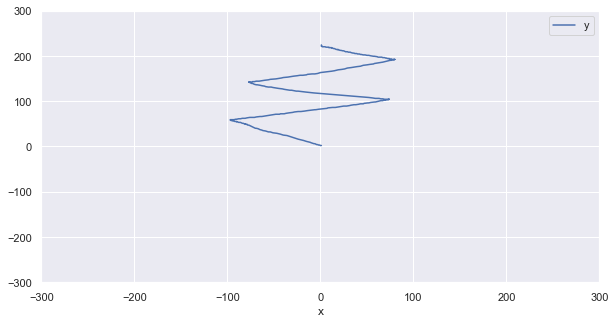

In [15]:
    #// BEGIN_TODO [DAS_1c] Select data (1 point)

ax2 = df_last_path.plot(x = 'x', y = 'y', color = 'b');

ax2.set_xlim(-300, 300);
ax2.set_ylim(-300, 300);

#// END_TODO [DAS_1c]

> Hint: After doing this exercise, go back and record some new mouse trajectories. Then, execute the code that you wrote for the previous exercises again, **without modifying it**. It should select the trajectory that you drew last.

### Exercise <span class="exercise">1.d</span>

Use a Gaussian filter with standard deviation of $25$ ms, to approximate the $x$- and $y$- coordinates of the trajectory in `df_last_path`. Store the $x$- and $y$-coordinates of the filtered path in columns labeled `'filt_x'` and `'filt_y'` respectively. Then use a Gaussian filter with standard deviation of $200$ ms, and store the filtered path in columns labeled `'filt_x_coarse'` and `'filt_y_coarse'`.

Finally, plot the original and the two filtered paths in one figure, with both axes ranging from -300 to 300.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Consider setting the `figsize` argument of the `plot()` function to something larger (e.g. `figsize=(10,10)`) to better visualize the differences between the filtering options.
</span>

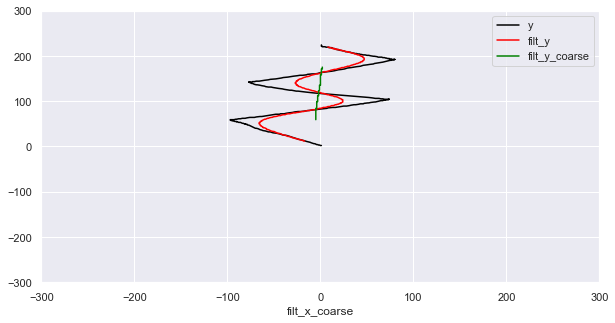

In [16]:
#// BEGIN_TODO [DAS_1d] Gaussian filter (1 point)

df_last_path['filt_x'] = gaussian_filter1d(df_last_path['x'], sigma = 25, mode='nearest')
df_last_path['filt_y'] = gaussian_filter1d(df_last_path['y'], sigma  =25, mode='nearest')
df_last_path['filt_x_coarse'] = gaussian_filter1d(df_last_path['x'], sigma = 200, mode = 'nearest')
df_last_path['filt_y_coarse'] = gaussian_filter1d(df_last_path['y'], sigma = 200, mode = 'nearest')

ax3 = df_last_path.plot(x = 'x', y='y', color = 'black');
df_last_path.plot(x = 'filt_x', y = 'filt_y', ax = ax3, color = 'red');
df_last_path.plot(x = 'filt_x_coarse', y = 'filt_y_coarse', ax = ax3, color = 'green');

ax3.set_xlim(-300, 300);
ax3.set_ylim(-300, 300);


In [17]:
#// END_TODO [DAS_1d]

Which filtered trajectory approximates the original curve best?

### Exercise <span class="exercise">1.e</span>

Now use a median filter, with a window size of `80` to approximate the $x-$ and $y-$ coordinates of the trajectory in `df_last_path`. Store the $x$- and $y$-coordinates of the filtered path in columns labeled `'med_filt_x'` and `'med_filt_y'` respectively. Similarly, use a median filter with window size of `200` and store the coordinates of the filtered path as columns `'med_filt_x_coarse'` and `'med_filt_y_coarse'`. 

Finally, plot the original and the two filtered paths in one figure, with both axes ranging from -300 to 300.

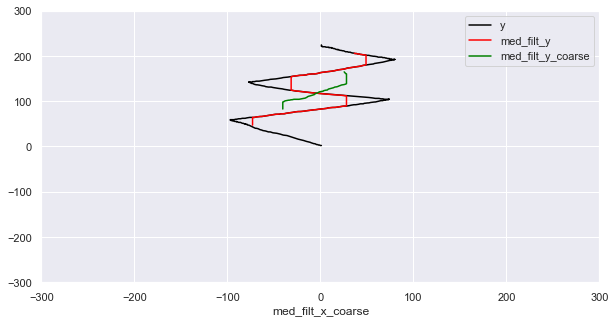

In [18]:
#// BEGIN_TODO [DAS_1e] Median filter (1 point)

df_last_path['med_filt_x'] = df_last_path['x'].rolling(80).median()
 
df_last_path['med_filt_y'] = df_last_path['y'].rolling(80).median()
df_last_path['med_filt_x_coarse'] = df_last_path['x'].rolling(200).median()
df_last_path['med_filt_y_coarse'] = df_last_path['y'].rolling(200).median()

ax4 = df_last_path.plot(x = 'x', y = 'y', color = 'black')
df_last_path.plot(x = 'med_filt_x', y = 'med_filt_y', ax = ax4, color = 'red');
df_last_path.plot(x = 'med_filt_x_coarse', y = 'med_filt_y_coarse', ax = ax4, color = 'green');

ax4.set_xlim(-300, 300);
ax4.set_ylim(-300, 300);

#// END_TODO [DAS_1e]

What differences do you see with respect to the Gaussian-filtered trajectories? You can experiment by drawing different trajectories.

## Computing changes and finding maxima

We will now introduce several new _Pandas_ functions. To illustrate their use, we consider the following example question:

_At what day was the biggest drop in the NASDAQ Composite?_

We approach this as follows. First, we calculate the differences between consecutive rows in a _Series_ with the _Pandas_ function **`diff()`**. We use it to add a new column, labeled `'close_diff'`, to the dataframe `df_nasdaq`.

In [19]:
df_nasdaq['close_diff'] = df_nasdaq['close'].diff()

df_nasdaq[['close', 'close_diff']].head()

,close,close_diff
Date,,
2007-01-03,2423.159912,NaN
2007-01-04,2453.429932,30.270020
2007-01-05,2434.250000,-19.179932
2007-01-08,2438.199951,3.949951
2007-01-09,2443.830078,5.630127


In the example above, the value of `'close_diff'` on `2007-01-04` equals to `'close'` on `2007-01-04` minus `'close'` on `2007-01-03`, etc. The value on `2007-01-03` is a `NaN`, because **`diff()`** is not defined for the first row.

For all rows, except the first, you can see that the value in the `'close_diff'` column is exactly the value in the `'close'` column in the same row, minus the value in the `'close'` column in the previous row. In the first row, you see a `NaN`, because _Pandas_ cannot calculate the difference between the first row and the row before that, because the latter does not exist.

Next, we want to know at which date the drop of NASDAQ Composite was the largest. In other words, we are interested for which `'Date'`, the change in closing value was the smallest (i.e. the most negative). We can find this out with the Pandas function **`idxmin()`**.

In [20]:
date_min = df_nasdaq['close_diff'].idxmin()
date_min

Timestamp('2016-06-24 00:00:00')

Apparently, the value drop was the largest on the 24th of June in 2016. Let us see what the drop actually was.

In [21]:
df_nasdaq.loc[date_min, 'close_diff']

-202.06005900000036

Similarly, we can find out the date with the largest increase of NASDAQ Composite by using the Pandas function **`idxmax()`**.

In [22]:
date_max = df_nasdaq['close_diff'].idxmax()
date_max

Timestamp('2008-10-13 00:00:00')

If we sum all the differences up to a particular row, we should get back the difference between the value in that row and the value in the initial row. We can compute such a _cumulative sum_ with the _Pandas_ function **`cumsum()`**. We add the column with cumulative sums to the dataframe as a new column labeled `'close_diff_cumulative'`. We also add a column labeled `'change_since_beginning'` in which we directly calculate the difference between the current value and the first value. The last two columns should then have the same values.

In [23]:
df_nasdaq['close_diff_cumulative'] = df_nasdaq['close_diff'].cumsum()
df_nasdaq['change_since_beginning'] = df_nasdaq['close'] - df_nasdaq['close'].iloc[0]
df_nasdaq[['close','close_diff','close_diff_cumulative','change_since_beginning']].head()

,close,close_diff,close_diff_cumulative,change_since_beginning
Date,,,,
2007-01-03,2423.159912,NaN,NaN,0.000000
2007-01-04,2453.429932,30.270020,30.270020,30.270020
2007-01-05,2434.250000,-19.179932,11.090088,11.090088
2007-01-08,2438.199951,3.949951,15.040039,15.040039
2007-01-09,2443.830078,5.630127,20.670166,20.670166


The values in the last two columns indeed coincide (except for the first row due to the `NaN`s). Note that we used `.iloc[0]` to refer to the first row in `df_nasdaq`, which is equivalent to `.loc[df_nasdaq.index[0]]`.

To get an impression of how volatile the NASDAQ Composite is, we may also be interested in the total absolute change up to a particular date. To get the absolute change from `'close_diff'` we could use the _Pandas_ function `abs()`, however, for the exercises later it is helpful if we show an alternative way.

In [24]:
df_nasdaq['abs_change'] = (df_nasdaq['close_diff']**2)**(1/2)
df_nasdaq['total_abs_change'] = df_nasdaq['abs_change'].cumsum()
df_nasdaq[['close','close_diff','abs_change','total_abs_change']].tail()

,close,close_diff,abs_change,total_abs_change
Date,,,,
2017-12-22,6959.959961,-5.399902,5.399902,76266.365519
2017-12-26,6936.250000,-23.709961,23.709961,76290.075480
2017-12-27,6939.339844,3.089844,3.089844,76293.165324
2017-12-28,6950.160156,10.820312,10.820312,76303.985636
2017-12-29,6903.390137,-46.770019,46.770019,76350.755655


Note that we used here `.tail()` to show the last 5 rows of the dataframe.

### Exercise <span class="exercise">1.f</span>

Add a new column to the dataframe `df_last_path`, with the label `'segment_length'`, containing in every row the length of the line segment between the $(x,y)$-coordinate of the current row and the previous row. In the first row, manually set the value of `'segment_length'` to `0`.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
The first row in a dataframe `df` is not necessarily the one at index = 0, but rather the one at index = `df.index[0]`.
</span>

In [25]:
#// BEGIN_TODO [DAS_1f] Lengths of line segments (1 point)

df_last_path['segment_length'] = ((df_last_path['x']**2) + (df_last_path['y']**2))**(0.5)

df_last_path['segment_length'] = df_last_path['segment_length'].diff()

df_last_path.loc[885, 'segment_length'] = 0

#// END_TODO [DAS_1f]

df_last_path.head(20)

,trial,t,x,y,filt_x,filt_y,filt_x_coarse,filt_y_coarse,med_filt_x,med_filt_y,med_filt_x_coarse,med_filt_y_coarse,segment_length
885,17,0.000000,1,2,-17,12,-5,59,NaN,NaN,NaN,NaN,0.000000
886,17,0.771446,0,2,-18,12,-5,59,NaN,NaN,NaN,NaN,-0.236068
887,17,0.779367,-1,3,-19,13,-5,60,NaN,NaN,NaN,NaN,1.162278
888,17,0.787307,-2,3,-20,14,-5,60,NaN,NaN,NaN,NaN,0.443274
889,17,0.795360,-3,4,-21,14,-5,60,NaN,NaN,NaN,NaN,1.394449
890,17,0.803664,-4,4,-22,15,-5,61,NaN,NaN,NaN,NaN,0.656854
891,17,0.811846,-5,5,-23,15,-5,61,NaN,NaN,NaN,NaN,1.414214
892,17,0.820060,-6,6,-24,16,-5,61,NaN,NaN,NaN,NaN,1.414214
893,17,0.828077,-7,6,-25,17,-5,62,NaN,NaN,NaN,NaN,0.734263
894,17,0.836352,-10,8,-26,17,-5,62,NaN,NaN,NaN,NaN,3.586704


### Exercise <span class="exercise">1.g</span>

Find the index in `df_last_path` at which the `'segment_length'` was longest. Assign your answer to the variable `i_longest_segment`.

In [26]:
#// BEGIN_TODO [DAS_1g] Longest segment (1 point)

i_longest_segment = df_last_path['segment_length'].idxmax()

#// END_TODO [DAS_1g]

i_longest_segment

907

### Exercise <span class="exercise">1.h</span>

Add a new column named `'path_length'` to `df_last_path`, containing in every row the cumulative sum of the line segments so far.

In [27]:
#// BEGIN_TODO [DAS_1h] Compute path length (1 point)

df_last_path['path_length'] = df_last_path['segment_length'].cumsum()

#// END_TODO [DAS_1h]

df_last_path.head()

,trial,t,x,y,filt_x,filt_y,filt_x_coarse,filt_y_coarse,med_filt_x,med_filt_y,med_filt_x_coarse,med_filt_y_coarse,segment_length,path_length
885,17,0.000000,1,2,-17,12,-5,59,NaN,NaN,NaN,NaN,0.000000,0.000000
886,17,0.771446,0,2,-18,12,-5,59,NaN,NaN,NaN,NaN,-0.236068,-0.236068
887,17,0.779367,-1,3,-19,13,-5,60,NaN,NaN,NaN,NaN,1.162278,0.926210
888,17,0.787307,-2,3,-20,14,-5,60,NaN,NaN,NaN,NaN,0.443274,1.369483
889,17,0.795360,-3,4,-21,14,-5,60,NaN,NaN,NaN,NaN,1.394449,2.763932


The next step will be to estimate the speed of the trajectory at any given moment. For this, we need to know more about how to approximate derivatives.

## Approximating derivatives and finding trends

Suppose now that we are interested in finding some trends in the stock data. For instance, we want to find periods in which the NASDAQ index was generally increasing and periods in which it was decreasing. We could try to plot the differences between consecutive days in closing prices, but this signal is so volatile that it is impossible to extract some useful information out of it:

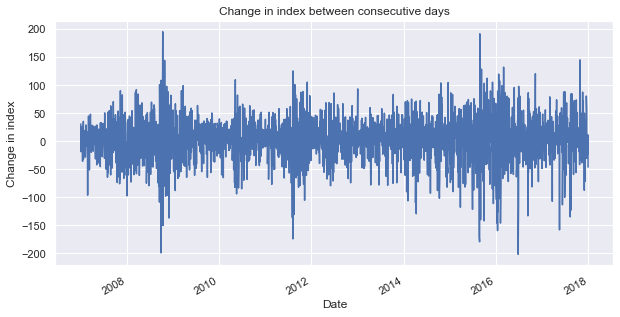

In [28]:
ax_marg = df_nasdaq['close_diff'].plot()
ax_marg.set_ylabel('Change in index')
ax_marg.set_title('Change in index between consecutive days');

You can use filtering to find an averaged derivative of the signal over a certain time window. For this, we apply a higher-order Gaussian filter to the original time signal. We indicate that we want a first-order filter by specifying the keyword argument `order=1`. (In general, `order=n` gives an approximation of the `n`th derivatives. The default value is `order=0`, which just gives an approximation to the original function.) We choose a standard deviation `sigma=30` for the Gaussian filter to average the derivatives over a time period of approximately a month.

In [29]:
df_nasdaq['close_filtered_deriv'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, order=1, mode='nearest')
df_nasdaq.head()

,close,close_filtered,median_filtered,close_diff,close_diff_cumulative,change_since_beginning,abs_change,total_abs_change,close_filtered_deriv
Date,,,,,,,,,
2007-01-03,2423.159912,2438.967378,NaN,NaN,NaN,0.000000,NaN,NaN,0.386445
2007-01-04,2453.429932,2439.354293,NaN,30.270020,30.270020,30.270020,30.270020,30.270020,0.385847
2007-01-05,2434.250000,2439.740575,NaN,-19.179932,11.090088,11.090088,19.179932,49.449952,0.385161
2007-01-08,2438.199951,2440.126123,NaN,3.949951,15.040039,15.040039,3.949951,53.399903,0.384430
2007-01-09,2443.830078,2440.511070,2438.199951,5.630127,20.670166,20.670166,5.630127,59.030030,0.383726


We visualize the approximate derivative in the graph below.

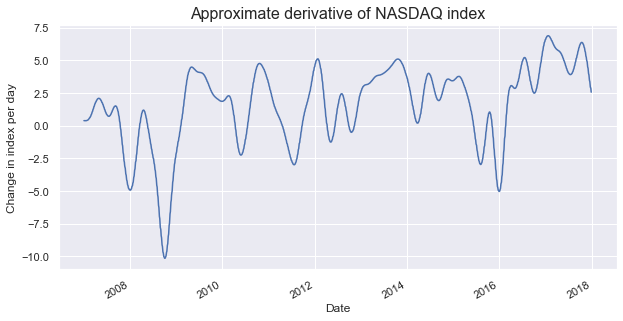

In [30]:
ax_deriv = df_nasdaq['close_filtered_deriv'].plot()
ax_deriv.set_title('Approximate derivative of NASDAQ index', fontsize=16);
ax_deriv.set_ylabel('Change in index per day');

### Exercise <span class="exercise" id="approximate_speed">1.i</span>

Approximate the _speed_ (in pixels per ms) of the trajectory in `df_last_path` by applying a Gaussian filter of order $1$ to the path length. Store the result in a column `'approximate_speed'`. Use a standard deviation of $25$ ms.
Plot the result.

1192    0.197955
1193    0.193337
1194    0.188630
1195    0.183845
1196    0.178990
Name: approximate_speed, dtype: float64

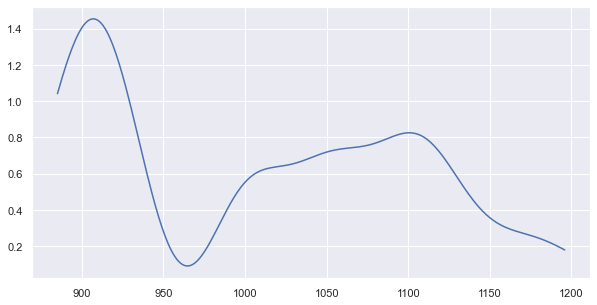

In [31]:
#// BEGIN_TODO [DAS_1i] Compute approximate speed (1 point)

df_last_path['approximate_speed'] = gaussian_filter1d(df_last_path['path_length'], sigma = 25, order = 1, mode = 'nearest')

ax_speed = df_last_path['approximate_speed'].plot()

#// END_TODO [DAS_1i]

df_last_path.approximate_speed.tail()

# <span class="section">2.</span> Data aggregation

In this section, we will compute more features of the data and introduce some very powerful _Pandas_ techniques:

* **Multi-level indexing**
* **Advanced data aggregation** with the function **`agg()`**
* **Joining** two dataframes with the function **`join()`**
* **Applying** a function, Series or dictionary to another Series with the function **`map()`**

Master these techniques, and you will be a truly skilled _Pandas_ user.

We work with the mouse trajectory data that was collected during the mouse experiment, which we load and prepare first. 

## Data preparation

### Data: mouse trajectories

The actual trajectories are stored in `'datasets/fitts.csv'`, which we read into the dataframe `df_fitts`. To create this file, we have processed recorded trajectories as in the previous section.

In [32]:
df_fitts = pd.read_csv('datasets/fitts.csv')
df_fitts.head()

,user,trial,t,x,y,path_length,approximate_speed
0,1164,5,0.00,-2.0,1.000000,0.000000,0.001584
1,1164,5,0.02,-2.0,0.936582,0.063418,0.002497
2,1164,5,0.04,-2.0,0.873164,0.126836,0.002995
3,1164,5,0.06,-2.0,0.809747,0.190253,0.003142
4,1164,5,0.08,-2.0,0.746329,0.253671,0.003166


The dataframe is very similar to the one of the previous section. The biggest difference is that it contains paths recorded by more than one user. Each user is assigned a unique number, which is stored in the **`'user'`** column.

### Multi-level indexing

Every row is _uniquely_ identified by the **triple** of values in the `'user'`, `'trial'` and `'t'` column. The combination of this triple would make for an ideal index for the dataframe. Such an index that is made out of multiple components is called a **multi-level index** (sometimes called a hierarchical index or MultiIndex). We make the triple of columns `'user'`, `'trial'` and `'t'` into a multi-level index, by providing their names as a list to the `set_index()` function. 

In [33]:
df_fitts.set_index(['user','trial','t'], inplace=True)
df_fitts.head()

x         y  path_length  approximate_speed
user trial t                                                  
1164 5     0.00 -2.0  1.000000     0.000000           0.001584
           0.02 -2.0  0.936582     0.063418           0.002497
           0.04 -2.0  0.873164     0.126836           0.002995
           0.06 -2.0  0.809747     0.190253           0.003142
           0.08 -2.0  0.746329     0.253671           0.003166

Rows can be retrieved from a dataframe with a multi-level index by supplying a value for all the index components to `.loc[]`. For example, the following will return the third row in the above dataframe:

In [34]:
df_fitts.loc[1164, 5, 0.04]

x                   -2.000000
y                    0.873164
path_length          0.126836
approximate_speed    0.002995
Name: (1164, 5, 0.04), dtype: float64

In the remainder of this notebook, we will use multi-level indexes mainly for joining dataframes.

### Data: user properties

The file `'datasets/user_props.csv'` contains settings that are constant for each user. It contains a table with the following columns:

* **`'user'`**: An integer number identifying each user
* **`'use_tue_laptop'`**: Whether user used a TU/e laptop
* **`'right_handed'`**: Whether user is right-handed or not
* **`'platform'`**: The operating system of the user
* **`'platform_version'`**: The version of the operating system of the user

We load it into the dataframe `df_user_props`.

In [35]:
df_user_props = pd.read_csv('datasets/user_props.csv')
df_user_props.head()

,user,use_tue_laptop,right_handed,platform,platform_version
0,1,1,1,Windows,10
1,2,1,1,Windows,10
2,4,1,1,Windows,10
3,6,1,1,Windows,10
4,7,1,1,Windows,10


Every row in this table is uniquely identified by the integer in the `'user'` column. Therefore, we set this column as the index of the dataframe.

In [36]:
df_user_props.set_index('user',inplace = True)
df_user_props.head()

,use_tue_laptop,right_handed,platform,platform_version
user,,,,
1,1,1,Windows,10
2,1,1,Windows,10
4,1,1,Windows,10
6,1,1,Windows,10
7,1,1,Windows,10


### Conversion to readable table entries

Some of the columns contain integers that do not have a clear meaning. The interpretation of these integers is encoded by the following dictionaries.

In [37]:
dict_use_tue_laptop = {0 : False, 1 : True}
dict_right_handed = {0 : False, 1 : True}

You can use these dictionaries to create more readable columns. But first there is a technical point that the values in for instance the column `'use_tue_laptop'` may be floats and not integers. So before you can use the dictionary, you would have to convert the column to integers.

In [38]:
df_user_props['use_tue_laptop'] = df_user_props['use_tue_laptop'].astype(int)

#### The _Pandas_ function **`map()`**

You can now use the _Pandas_ function **`map()`** with the argument `dict_use_tue_laptop` to map every `0` to a `False` and every `1` to a `True`.

In [39]:
df_user_props['use_tue_laptop'] = df_user_props['use_tue_laptop'].map(dict_use_tue_laptop)
df_user_props.head()

,use_tue_laptop,right_handed,platform,platform_version
user,,,,
1,True,1,Windows,10
2,True,1,Windows,10
4,True,1,Windows,10
6,True,1,Windows,10
7,True,1,Windows,10


### Data: user trial properties

The file `'datasets/user_trial_props.csv'` contains settings that are specific to each user trial. It contains a table with the following columns:

* **`'user'`**: an integer that identifies the user who drew the trajectory
* **`'trial'`**: an integer that identifies the trajectory. The pair of `'user'` and `'trial'` identify a trajectory uniquely
* **`'delay'`**: the time in seconds between the user moving the mouse on the red square in the origin, until the target appeared
* **`'input_method'`**: whether the user used a trackpad or a mouse
* **`'target_radius'`**: the radius of the target in pixels
* **`'target_x'`**: the $x$-coordinate of the target in pixels
* **`'target_y'`**: the $y$-coordinate of the target in pixels
* **`'total_time'`**: the total time of the trial in seconds

The meaning of the values in the `'input_method'` columns is encoded by the following dictionary.

In [40]:
dict_input_method = { 0 : 'trackpad', 1 : 'mouse' }

We read those properties into the dataframe `df_user_trial_props`.

In [41]:
df_user_trial_props = pd.read_csv('datasets/user_trial_props.csv')
df_user_trial_props.head()

,user,trial,delay,input_method,target_radius,target_x,target_y,total_time
0,1226,5,2.136719,0,6,-84,-84,3.607323
1,1226,6,3.540913,0,6,0,190,1.867664
2,1226,7,3.688381,0,6,-158,-158,1.645011
3,1226,8,2.823134,0,3,81,-81,1.776010
4,1226,9,3.690253,0,9,-157,157,1.567794


Each row in the dataframe `df_user_trial_props` is uniquely determined by the pair of values in the `'user'` and `'trial'` column. This pair of values would therefore make for an ideal **multi-level index** of the dataframe.

### Exercise <span class="exercise">2.a</span>

Set the index of the dataframe `df_user_trial_props` to a multi-level index consisting of the `'user'` and `'trial'` columns.

In [42]:
#// BEGIN_TODO [DAS_2a] Multi-level index (1 point)

df_user_trial_props.set_index(['user','trial'], inplace = True)

#// END_TODO [DAS_2a]

df_user_trial_props.head()

delay  input_method  target_radius  target_x  target_y  \
user trial                                                              
1226 5      2.136719             0              6       -84       -84   
     6      3.540913             0              6         0       190   
     7      3.688381             0              6      -158      -158   
     8      2.823134             0              3        81       -81   
     9      3.690253             0              9      -157       157   

            total_time  
user trial              
1226 5        3.607323  
     6        1.867664  
     7        1.645011  
     8        1.776010  
     9        1.567794

### Exercise <span class="exercise">2.b</span>

Use the dictionary `dict_right_handed` to convert the data in the column `'right_handed'` in `df_user_props` to more readable values. Similarly, use the dictionary `dict_input_method` to convert the data in the column `'input_method'` in the dataframe `df_user_trial_props` to more readable values.

In [43]:
#// BEGIN_TODO [DAS_2b] Convert columns in dataframes (1 point)

dict_right_handed = {0 : False, 1 : True}
dict_input_method = {0 : 'trackpad', 1 : 'mouse'}

df_user_props['right_handed'] = df_user_props['right_handed'].astype(int)
df_user_trial_props['input_method'] = df_user_trial_props['input_method']
df_user_props['right_handed'] = df_user_props['right_handed'].map(dict_right_handed)

df_user_trial_props['input_method'] = df_user_trial_props['input_method'].map(dict_input_method)

#// END_TODO [DAS_2b]

df_user_trial_props.head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1226 5      2.136719     trackpad              6       -84       -84   
     6      3.540913     trackpad              6         0       190   
     7      3.688381     trackpad              6      -158      -158   
     8      2.823134     trackpad              3        81       -81   
     9      3.690253     trackpad              9      -157       157   

            total_time  
user trial              
1226 5        3.607323  
     6        1.867664  
     7        1.645011  
     8        1.776010  
     9        1.567794

## Data aggregation

In the EDA exercises you have already encountered various ways to aggregate data. One very useful method was to _group_ the data. For instance, if we want to compute the average approximate speed in every trial, we can do this by first grouping on `'user'` and `'trial'`, selecting the `'approximate'` column and computing the mean.

In [44]:
df_speeds = df_fitts.groupby(['user','trial'])[['approximate_speed']].mean()
df_speeds.head()

approximate_speed
user trial                   
54   5               0.175054
     6               0.172605
     7               0.143626
     8               0.143971
     9               0.096142

Note that the resulting dataframe is indexed by the pair of `'user'` and `'trial'` as a multi-level index.

### Computing several aggregated quantities at once

The _Pandas_ library provides a very convenient function **`agg()`**, which can compute several aggregated quantities on grouped data at once. As an argument, you can supply a dictionary, which maps column names to either

* a name of a function (string), e.g. `'mean'`, `'median'`, `'sum'`, or `'count'`
* a function
* a list of names of functions, e.g. `['sum','count']`

We present an example of the last usage. We compute both the **mean** and the **median** of `'approximate_speed'` and the **max** value of `'x'`

In [45]:
df_features = df_fitts.groupby(['user','trial']).agg({'approximate_speed':['mean','median'], 'x':['max']})
df_features.head()

approximate_speed                     x
                        mean    median         max
user trial                                        
54   5              0.175054  0.042922   12.502372
     6              0.172605  0.063461  137.000000
     7              0.143626  0.040945    2.000000
     8              0.143971  0.036264    0.000000
     9              0.096142  0.009530   96.000000

In the result, not only do the rows have a multi-level index, but also the columns. For our next step, this is not so useful, so we first rename the columns.

In [46]:
df_features.columns=['appr_speed_mean', 'appr_speed_median', 'x_max']
df_features.head()

appr_speed_mean  appr_speed_median       x_max
user trial                                                
54   5             0.175054           0.042922   12.502372
     6             0.172605           0.063461  137.000000
     7             0.143626           0.040945    2.000000
     8             0.143971           0.036264    0.000000
     9             0.096142           0.009530   96.000000

### Joining two dataframes

We now want to add the computed features as columns to the old dataframe with properties `df_user_trial_props`. We can do this by _joining_ two dataframes with the _Pandas_ function **`join()`**. We store the result in a dataframe `df_results`. 

In [47]:
df_results = df_user_trial_props.join(df_features)
df_results.head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1226 5      2.136719     trackpad              6       -84       -84   
     6      3.540913     trackpad              6         0       190   
     7      3.688381     trackpad              6      -158      -158   
     8      2.823134     trackpad              3        81       -81   
     9      3.690253     trackpad              9      -157       157   

            total_time  appr_speed_mean  appr_speed_median  x_max  
user trial                                                         
1226 5        3.607323              NaN                NaN    NaN  
     6        1.867664              NaN                NaN    NaN  
     7        1.645011              NaN                NaN    NaN  
     8        1.776010              NaN                NaN    NaN  
     9        1.567794              NaN                NaN    NaN

> **Important:** For the **`join()`** function to behave properly, it is important that the two dataframes are indexed in the same way. For example, it was essential for joining `df_user_trial_props` with `df_features` that we used the same multi-level index for both dataframes.

Because only the paths of a few users are stored in `df_fitts`, for most users we could not compute the features, and they appear as `NaN`s in the table above. However, if we remove those, we can see that the features were added.

In [48]:
df_results.dropna().head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1164 5      2.387640        mouse              9       103      -103   
     6      3.133959        mouse              9       169       169   
     7      3.481099        mouse              3         0      -147   
     8      2.680347        mouse              3         0       170   
     9      2.447131        mouse              6      -199      -199   

            total_time  appr_speed_mean  appr_speed_median  x_max  
user trial                                                         
1164 5        0.690162         0.274753           0.160916  111.0  
     6        0.987574         0.311535           0.062526  180.0  
     7        1.054624         0.150710           0.001744   13.0  
     8        0.884709         0.195260           0.006782    1.0  
     9        1.440885         0.252423           0.060087    0.0

### Exercise <span class="exercise">2.c</span>

Compute the length for each trajectory in `df_fitts` and join the result with the dataframe `df_results`. Call the resulting dataframe `df_fitts_results`. Make sure that the column containing the total length is called `'length'`.

In [49]:
df_fitts.head()

x         y  path_length  approximate_speed
user trial t                                                  
1164 5     0.00 -2.0  1.000000     0.000000           0.001584
           0.02 -2.0  0.936582     0.063418           0.002497
           0.04 -2.0  0.873164     0.126836           0.002995
           0.06 -2.0  0.809747     0.190253           0.003142
           0.08 -2.0  0.746329     0.253671           0.003166

In [51]:
#// BEGIN_TODO [DAS_2c] Compute the length per trajectory (1 point)

g = df_fitts.groupby(['trial']).agg({'path_length':['sum']})
g.columns=['length']
df_fitts_results = g.join(df_results)

#// END_TODO [DAS_2c]

df_fitts_results.dropna().head()

length     delay input_method  target_radius  target_x  \
user trial                                                                  
1164 5      201126.570500  2.387640        mouse              9       103   
     6      273028.036982  3.133959        mouse              9       169   
     7      356463.149553  3.481099        mouse              3         0   
     8      339251.377101  2.680347        mouse              3         0   
     9      304424.402766  2.447131        mouse              6      -199   

            target_y  total_time  appr_speed_mean  appr_speed_median  x_max  
user trial                                                                   
1164 5          -103    0.690162         0.274753           0.160916  111.0  
     6           169    0.987574         0.311535           0.062526  180.0  
     7          -147    1.054624         0.150710           0.001744   13.0  
     8           170    0.884709         0.195260           0.006782    1.0  
     9          -199    1.440885         0.252423           0.060087    0.0

### Exercise <span class="exercise">2.d</span>

Compare the mean and median trajectory length per input method. The result should be a dataframe indexed by input method and have columns containing the mean and the median total length.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Use the `df_fitts_results` dataframe.
</span>

In [52]:
#// BEGIN_TODO [DAS_2d] Mean and median per input method (1 point)

df_fitts_results.groupby(['input_method']).agg({'length':['mean', 'median']})

#// END_TODO [DAS_2d]

length               
                       mean         median
input_method                              
mouse         326161.669033  339251.377101
trackpad      327129.552337  341342.178805

Do you see any differences in path lengths between mouse trajectories and trackpad trajectories? 

Let us now compare total times instead. Let's not only compute two statistics of the data, the median and the mean, but instead look at the *distribution* of the total times.

# <span class="section">3.</span> Empirical cumulative distribution functions

To better compare the total times for mouse and trackpad trajectories, we will now look at their empirical cumulative distribution functions (ECDFs).

Intuitively, $\mathrm{ECDF}$ is a function of $x$ that for a given value of $x$ returns the fraction of observations that are *lower or equal* to $x$.

More precisely, if $x_1, \dots, x_N$ are the $N$ outcomes of an experiment, the ECDF, evaluated in $x$, is defined as the number $N_x$ of indices $i$ such that $x_i \leq x$, divided by $N$:

$$
\mathrm{ECDF}(x) = \frac{N_x}{N}= \frac{1}{N} \# \{ i \ |\ x_i \leq x \}. 
$$

The following figure shows an example of an ECDF for an experiment where the outcomes ranged between 0 and 50 and were sampled from a normal distribution:

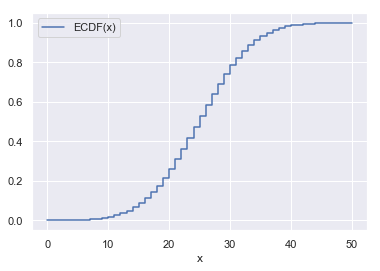

We will show how to compute and plot the ECDF. 

Although the Python library _statsmodels_ provides a function `ECDF()` that can compute the ECDF for you, we present how to compute the ECDF by hand. This way we will get to know and practice with very useful _Pandas_ functions **`value_counts()`** and **`sort_index()`** and we will get more insight in what the ECDF actually is. Moreover, plotting an ECDF remains a bit tricky: using the library function provides almost no advantage.

Let us consider a made-up experiment sampling integer numbers between 0 and 10 with outcomes `[5,3,5,7,1]`.

In [ ]:
df_experiment = pd.DataFrame([5,3,5,7,1], columns=['outcome']) 
df_experiment

To determine the ECDF, we first want to know, for every value appearing in the `'outcome'` column, how often it occurs. For this, we use the _Pandas_ function **`value_counts()`**.

In [ ]:
df_experiment['outcome'].value_counts()

We interpret the result of `value_counts()` as follows: The value `5` appears `2` times in the `'outcome'` column, the value `7` appears `1` time, as do the values `3` and `1`. We rename the Series to `'counts'`, and convert it to a dataframe `df_counts`.

In [ ]:
df_counts = pd.DataFrame( df_experiment['outcome'].value_counts().rename('counts') )
df_counts

Next, we want to sort the index. This will later allow us to compute the ECDF efficiently.

In [ ]:
df_counts.sort_index(inplace=True)
df_counts

The ECDF can now be computed easily. To find the ECDF evaluated in a point $x$, we need two pieces of information
* The number $N_x$ of outcomes smaller than or equal to $x$
* The total number of outcomes $N$

Then $\mathrm{ECDF}(x) = N_x/ N$.
Therefore, the ECDF evaluated at the `index` in the dataframe above, is equal to the cumulative sum of the `'counts'` column, divided by $N$.

In [ ]:
df_counts['ecdf'] = df_counts['counts'].cumsum() / df_counts['counts'].sum()
df_counts

Plotting the ECDF is in fact quite tricky. A graph of an ECDF is a step function, i.e. piecewise flat. To achieve this, we provide the keyword argument `drawstyle ='steps-post'`. 

In [ ]:
ax = df_counts[['ecdf']].plot(drawstyle='steps-post')
ax.set_xlim(0,10)

The graph has a major flaw: it suddenly starts at the smallest recorded outcome, and stops at the largest recorded outcome, even though the ECDF is actually defined on the whole real line. We want to draw the graph for the whole plot range, which for our example above means that we want to plot the ECDF from `x=0` to `x=10`.

Therefore, we copy the `'ecdf'` column of the dataframe `df_counts` to a dataframe `df_ecdf` and add two more $x$-values to the dataframe `df_ecdf` together with the corresponding value of the ECDF: 
* one value of $x$ much smaller than the smallest recorded outcome, e.g. $x = -2000$, so the ECDF in that point is $\mathrm{ECDF}(-2000) = 0$. 
* one value of $x$ much larger than the largest recorded outcome, e.g. $x = 2000$, so the ECDF in that point is $\mathrm{ECDF}(2000) = 1$.

> **Note:** The precise values $x=-2000$ and $x=2000$ are not important. For the plotting it only matters that the first value is smaller than the left boundary of the plot, and the second is larger than the right boundary. We choose our values _much_ smaller and _much_ larger respectively, so that we don't have to change the values if we change our mind about our desired plot range.

In [ ]:
df_ecdf = df_counts[['ecdf']].copy()
df_ecdf.loc[-2000,'ecdf'] = 0
df_ecdf.loc[2000,'ecdf'] = 1
df_ecdf

We sort once more the dataframe by the index.

In [ ]:
df_ecdf.sort_index(inplace=True)
df_ecdf

Now we are finally ready to plot the ECDF. 

In [ ]:
ax = df_ecdf['ecdf'].plot( drawstyle ='steps-post' )
ax.set_xlim(0, 10)
ax.set_xlabel('outcome')
ax.set_title('ECDF', fontsize=14);

## Exercises: compare ECDFs for mouse a trackpad trajectories

To get more insight into the differences in total times needed to reach a target by using a mouse vs. a trackpad, we aim to plot both the ECDF for the total times for the *mouse* trajectories and the ECDF for the *trackpad* trajectories in one figure. This is a rather big task, so we split it up in several exercises for the mouse trajectories. Afterwards, you can apply the same steps for the trackpad trajectories.

### Exercise <span class="exercise">3.a</span>

Use the dataframe `df_user_trial_props` to create a dataframe `df_mouse`. The dataframe `df_mouse` should contain one column, labeled `'total_time'`, with the total time for each trajectory that was recorded with a **mouse**.

In [ ]:
#// BEGIN_TODO [DAS_3a] Total times mouse trajectories (1 point)

df_input_method = df_user_trial_props[(df_user_trial_props['input_method']) == 'mouse']
df_mouse = df_input_method.groupby(['trial']).agg({'total_time':['sum']})
df_mouse.rename(columns = {'sum':'total_time'}, inplace = True)
df_mouse.columns=['total_time']

#// END_TODO [DAS_3a]

df_mouse.head()

### Exercise <span class="exercise">3.b</span>

Create a dataframe `df_mouse_counts` indexed by all total times occurring in the dataframe `df_mouse`. The dataframe `df_mouse_counts` should contain one column, labeled `'counts'`, which contains how often that total time occurs in `df_mouse`. Make sure that the indices are sorted.

In [ ]:
#// BEGIN_TODO [DAS_3b] Count occurences total times (1 point)

df_mouse_counts = df_mouse['total_time'].value_counts()
df_mouse_counts = pd.DataFrame(df_mouse['total_time'].value_counts().rename('counts'))
df_mouse_counts.sort_index(inplace = True)
df_mouse_counts.columns=['counts']

#// END_TODO [DAS_3b]

df_mouse_counts.head()

### Exercise <span class="exercise">3.c</span>

Add a column labeled `'ecdf'` to the dataframe `df_mouse_counts`, containing the value of the ECDF evaluated at the time in the index.

In [ ]:
#// BEGIN_TODO [DAS_3c] Add column with ECDF (1 point)

df_mouse_counts['ecdf'] = df_mouse_counts['counts'].cumsum() / df_mouse_counts['counts'].sum()

#// END_TODO [DAS_3c]

df_mouse_counts.head()

### Exercise <span class="exercise">3.d</span>

Copy the `'ecdf'` column of the dataframe `df_mouse_counts` to a new dataframe `df_mouse_ecdf`. Add two new values of the ECDF to this dataframe, one at a very large negative time, and one at a very large positive time, let's say at time $-2000$ s and $2000$ s. Make sure that the index of the dataframe is sorted.

In [ ]:
#// BEGIN_TODO [DAS_3d] Add new values to ECDF dataframe (1 point)

df_mouse_ecdf = df_mouse_counts[['ecdf']].copy()
df_mouse_ecdf.sort_index(inplace = True)
df_mouse_ecdf.loc[-2000, 'ecdf'] = 0
df_mouse_ecdf.loc[2000, 'ecdf'] = 1
df_mouse_ecdf.sort_index(inplace=True)

#// END_TODO [DAS_3d]

df_mouse_ecdf.head()

> **Note:** When you are working towards a goal (such as plotting an ECDF) and you need to make multiple steps, it is good to regularly display some intermediate results to see whether everything looks as expected. Exactly for this reason, we have called the `head()` function at the end of each code cell. However, after this exercise, we would also like to know whether the value of the ECDF at time $2000$ s is inserted correctly.

### Exercise <span class="exercise">3.e</span>

Display the last five rows of the dataframe `df_mouse_ecdf`. 

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Just like the function `head()` displays the first five rows of a dataframe, the function `tail()` displays the last five rows.
</span>

In [ ]:
#// BEGIN_TODO [DAS_3e] Display last five rows ECDF dataframe (1 point)

df_mouse_ecdf.tail()

#// END_TODO [DAS_3e]

Does everything look okay? Then let's follow the same steps for the trackpad trials.

### Exercise <span class="exercise">3.f</span>
    
Create a dataframe `df_trackpad_ecdf` indexed by all total times occurring in **trackpad** trajectories, an additional very large negative time and a very large positive time, and with a column `'ecdf'` containing the value of the ECDF at these times. We advise you to use multiple code cells and regularly display output to check whether everything looks as expected.

In [ ]:
#// BEGIN_TODO [DAS_3f] Create ECDF for trackpkad trajectories (2 points)




In [ ]:
#// END_TODO [DAS_3f]

df_trackpad_ecdf.head()

Time to see the results... 

### Exercise <span class="exercise">3.g</span>

Plot in one figure:

* the ECDF of the total time used for the **mouse** trials
* the ECDF of the total time used for the **trackpad** trials

Make sure the $x$-axis runs from $0$ to $4$ (s), and include a legend explaining which graph corresponds to the mouse, and which corresponds to the trackpad.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Use dataframes `df_mouse_ecdf` and `df_trackpad_ecdf` defined above.
</span>

In [ ]:
#// BEGIN_TODO [DAS_3g] Plot ECDFs (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [DAS_3g]

# <span class="section">4.</span> Exercise: find ballistic motion


*In the earlier exercises you were closely guided. In the following exercises we will put your knowledge to the test.*

*Note that these exercises may seem more difficult as you will need to work more indepedently. When you struggle with an exercise then go back to the corresponding earlier section and make sure you really understand the introduced concepts. Do not hesitate to experiment with your own code!*


In this exercise, we will use the data in `'datasets/path.csv'`, loaded into the dataframe `df_path`:

In [ ]:
df_path = pd.read_csv('datasets/path.csv')
df_path.head()

It contains several features that were derived from the raw data of a single mouse trajectory, similarly to the exercises in Section 1. The `'filt_x'` and `'filt_y'` columns contain the approximate $𝑥$- and  $𝑦$- coordinates computed by applying a Gaussian filter to the raw coordinates, and the  `'approximate_speed'` column contains the approximate speed (in pixels per ms) computed by applying a Gaussian filter of order 1 to the path length.

In this exercise we will extract one more feature, which was already mentioned in the lecture: we are going to extract the _ballistic part_ of the mouse trajectory. This is quite challenging, so do not hesitate to ask your tutor for hints.

The ballistic part of the motion is the motion restricted to a certain time-interval (from `i_left` to `i_right`) around the time `i_max` at which the speed is maximal, as illustrated by the following picture.

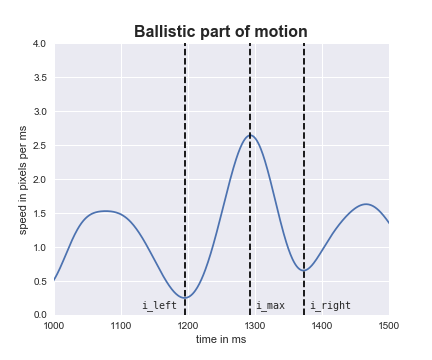

Here is a picture of the corresponding path, where the ballistic part of the motion is indicated in black.

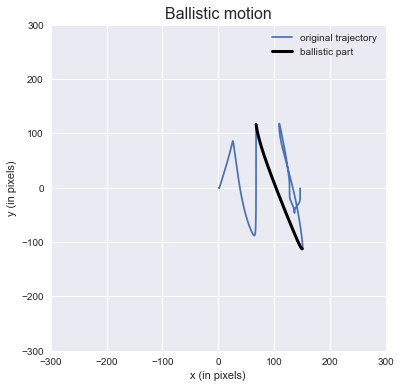

We want to use _Pandas_ to extract this ballistic part of the trajectory. For that, we need a _very precise definition_. The precise definition of the _ballistic_ part of the mouse trajectory is as follows: we first find the index `i_max` for which the (approximate) _speed_ is maximal (if there are multiple such indices, we take the smallest). Then, we define the range of indices from `i_left` to `i_right` as the largest range of indices containing `i_max` such that the speed is _increasing_ from `i_left` to `i_max` and _decreasing_ from `i_max` to `i_right`. The _ballistic_ part of the mouse trajectory is defined as the mouse trajectory restricted to the range from `i_left` to `i_right`.

In other words, `i_left` is the smallest index such that for every index `i` between `i_left`  and `i_max` the approximate speed at `i` is _larger than or equal to_ the approximate speed at `i-1`. Similarly, `i_right` is the largest index such that for every `i` between `i_max + 1` and `i_right`, the approximate speed at `i` is _smaller than or equal to_ the approximate speed at `i-1`.

Our goal will be to find `i_left` and `i_right` for the trajectory in `df_path`. We will afterwards define the dataframe `df_ballistic` as `df_path[i_left:i_right]`.

### Exercise <span class="exercise">4.a</span>

Find the index in `df_path` for which the `'approximate_speed'` is maximal. Assign your answer to the variable `i_max`.

In [ ]:
#// BEGIN_TODO [DAS_4a] Find i_max (1 point)

i_max = df_path['approximate_speed'].idxmax()

#// END_TODO [DAS_4a]

df_path[i_max-2:i_max+3]

In the above dataframe, the approximate speed should be maximal for the row in the middle, with index equal to `i_max`:

In [ ]:
i_max

### Exercise <span class="exercise">4.b</span>

Add a column labeled `'speed_diff'` to the dataframe `df_path`, containing in every row the difference between the approximate speed in that row and the approximate speed in the previous row.

In [ ]:
#// BEGIN_TODO [DAS_4b] Add speed_diff (1 point)

df_path['speed_diff'] = df_path['approximate_speed'].diff()

#// END_TODO [DAS_4b]

df_path.head()

### Exercise <span class="exercise">4.c</span>

Find `i_left`, the smallest index in `df_path` such that for every index `i` between `i_left` and `i_max` (i.e. `i_left` $\leq$ `i` $\leq$ `i_max`) the approximate speed at `i` is _larger than or equal to_ the approximate speed at `i-1`.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Note that a trajectory consists of alternating chunks for which `i` is _larger than or equal to_ the approximate speed at `i-1`, and those for which its opposite holds. We can get `i_left` by finding the last chunk for which the opposite holds (i.e. where speed at `i` is _strictly less than_ the speed at `i-1`).
</span>

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
First use slicing and the index `i_max` to make a new dataframe `df_first_part` which only contains the rows up to (and including) the index `i_max`. Next, use the column `'speed_diff'` created before to select only those rows `i` for which the speed at `i` is *strictly less than* the speed at `i-1`. You can use this last dataframe to find out what `i_left` should be.
</span>

In [ ]:
#// BEGIN_TODO [DAS_4c] Find i_left (1 point)

df_first_path = df_path.loc[0:i_max]
df_left = df_first_path[(df_first_path['speed_diff'] < 0)]
i_left = df_left.tail(1).index + 1
i_left = i_left.astype(int)
i_left = 425

In [ ]:
#// END_TODO [DAS_4c]
i_left

The following code cell can give you a quick (although not a full) check of your work. If everything worked out, the value in the column `'speed_diff'` should be less than zero in the first row, and larger than or equal to zero in the other rows.

In [ ]:
df_path.loc[i_left-1:i_left+3]

Note that an interval `.loc[a:b]` includes both `a` and `b`.

### Exercise <span class="exercise">4.d</span>

Find `i_right`, the largest index such that for every index `i` between `i_max + 1` and `i_right` (`i_max + 1` $\leq$ `i` $\leq$ `i_right`) the approximate speed at `i` is _smaller than or equal to_ the approximate speed at `i-1`.

In [ ]:
#// BEGIN_TODO [DAS_4d] Find i_right (1 point)

df_second_path = df_path.loc[i_max + 1:]
df_right = df_second_path[(df_second_path['speed_diff'] > 0)]
i_right = df_right.head(1).index 
i_right = i_right.astype(int) - 1
i_right = 671

#// END_TODO [DAS_4d]

i_right

The next code cell can give you a quick (although not a full) check of your work. If everything worked out, the value in the column `'speed_diff'` should be larger than zero in the last row, and less than or equal to zero in the other rows.

In [ ]:
df_path.loc[i_right-3:i_right+1]

Now we are ready to define `df_ballistic`:

In [ ]:
df_ballistic = df_path.loc[i_left:i_right]
df_ballistic.head()

In [ ]:
df_ballistic.tail()

### Exercise <span class="exercise">4.e</span>

Plot the full, filtered, mouse trajectory (with coordinates `'filt_x'` and `'filt_y'`) in `df_path` in blue, and on top of it indicate the ballistic motion with a thick, black curve (i.e. with `linewidth` equal to `3`).

In [ ]:
#// BEGIN_TODO [DAS_4e] Plot ballistic motion (1 point)

ax5 = df_path.plot(x = 'filt_x', y ='filt_y', c = 'black')
df_ballistic.plot(x = 'filt_x', y ='filt_y', c = 'red', linewidth = 3, ax= ax5);

#// END_TODO [DAS_4e]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)

feedback_time = 8

#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)

feedback_difficulty = 8

#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to submit your work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.

2. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.

3. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.

* In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  
* If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [ ]:
# List all defined names
%whos

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2021 - **TU/e** - Eindhoven University of Technology